In [36]:
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
from label_converter import equals
import pandas as pd
import numpy as np
from IPython.display import Image
from utils.plots import plot_images


In [2]:
YOLOBCC_DATA, YOLO_DATA, YOLO_PT_BCC_DATA = pickle.load(open('SANITY_CHECK_DATA.pkl', 'rb'))

In [3]:
DATA = {'y': YOLO_DATA, 'yb': YOLOBCC_DATA, 'yptb': YOLO_PT_BCC_DATA}

In [4]:
def find_shape(x):
    try:
        return x.shape
    except (TypeError, AttributeError):
        try:
            return [i.shape for i in x]
        except:
            try:
                return len(x)
            except TypeError:
                return 'NA'

def display_img_tgt(mode='y', e=0, b=0, tgt_key='targets'):
    print(f'Only YOLO: epoch:{e} batch:{b}')
    imgs = DATA[mode][f'epoch_{e}'][f'batch_{b}']['imgs_unn']
    targets = DATA[mode][f'epoch_{e}'][f'batch_{b}'][tgt_key]
    plot_images(imgs, targets, names = ['BL', 'DC'])
    pil_img = Image(filename='images.jpg')
    display(pil_img)

In [5]:
df1 = pd.DataFrame({k: v['batch_0'] for k, v in YOLOBCC_DATA.items()})
df2 = pd.DataFrame({k: v['batch_0'] for k, v in YOLO_DATA.items()})
df3 = pd.DataFrame({k: v['batch_0'] for k, v in YOLO_PT_BCC_DATA.items()})

Only YOLO: epoch:0 batch:0


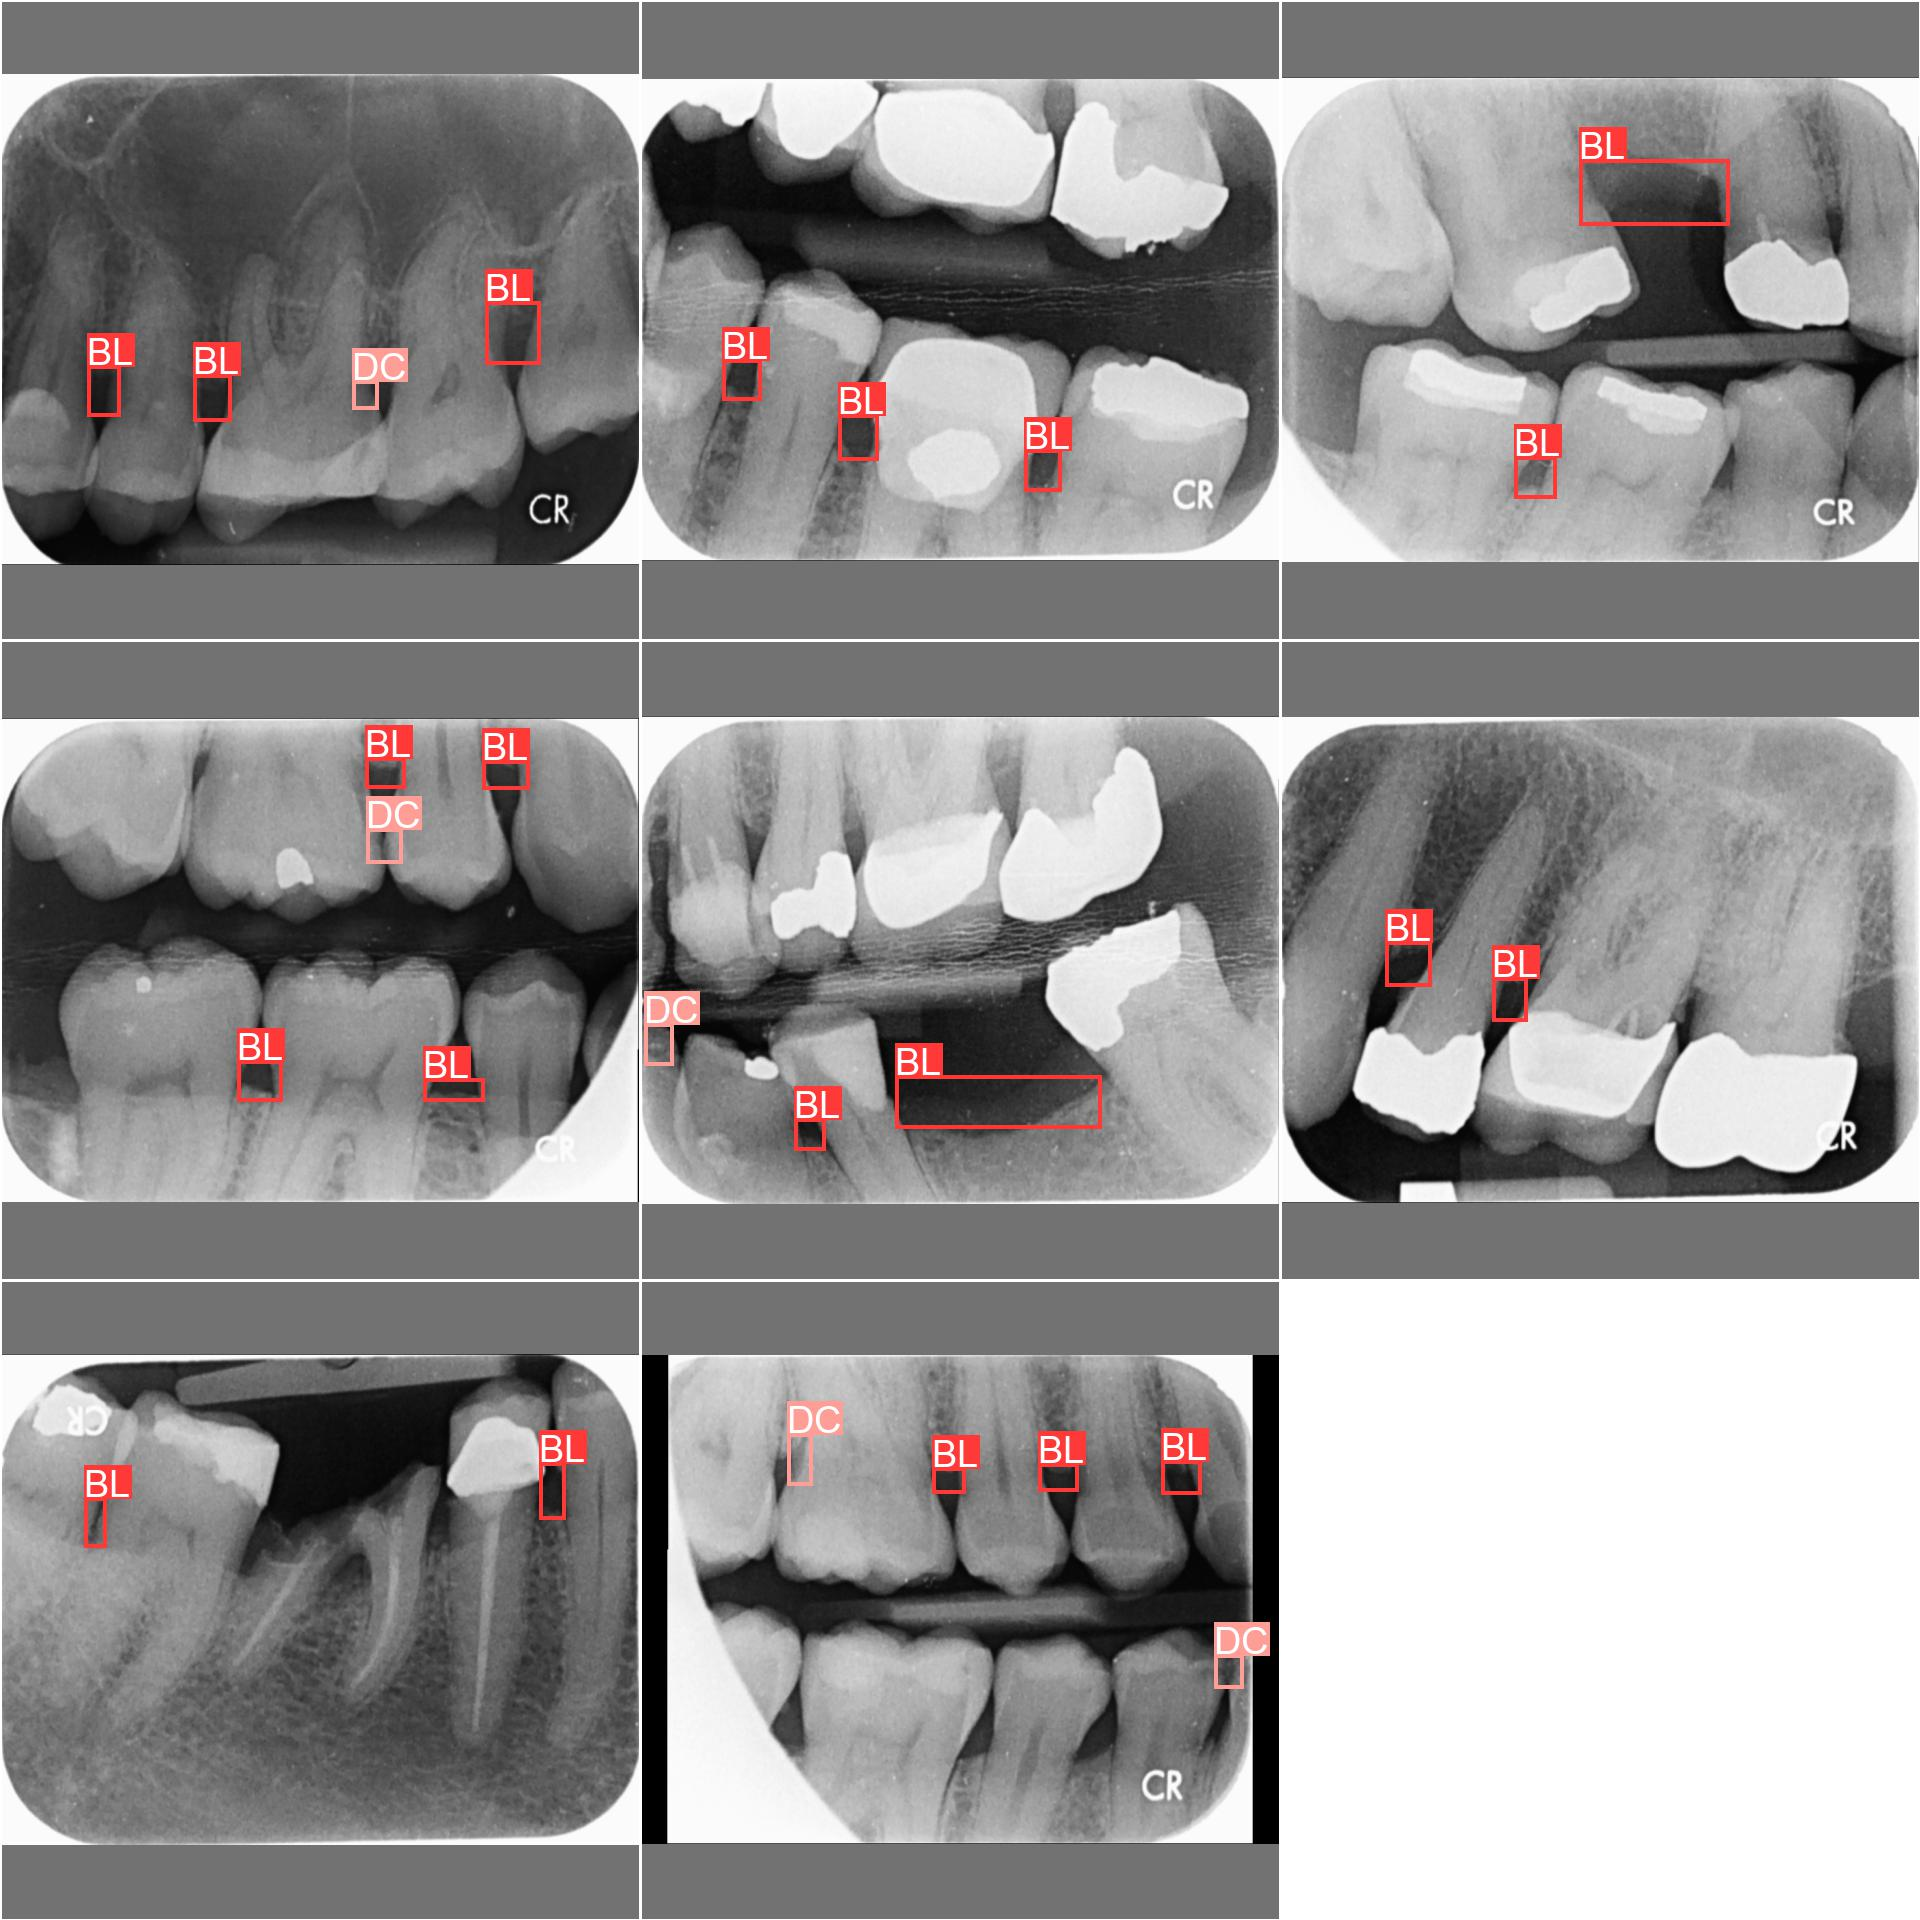

In [27]:
b = 0
for e in range(1):
    display_img_tgt('yb', e, b, 'targets')

Only YOLO: epoch:3 batch:0


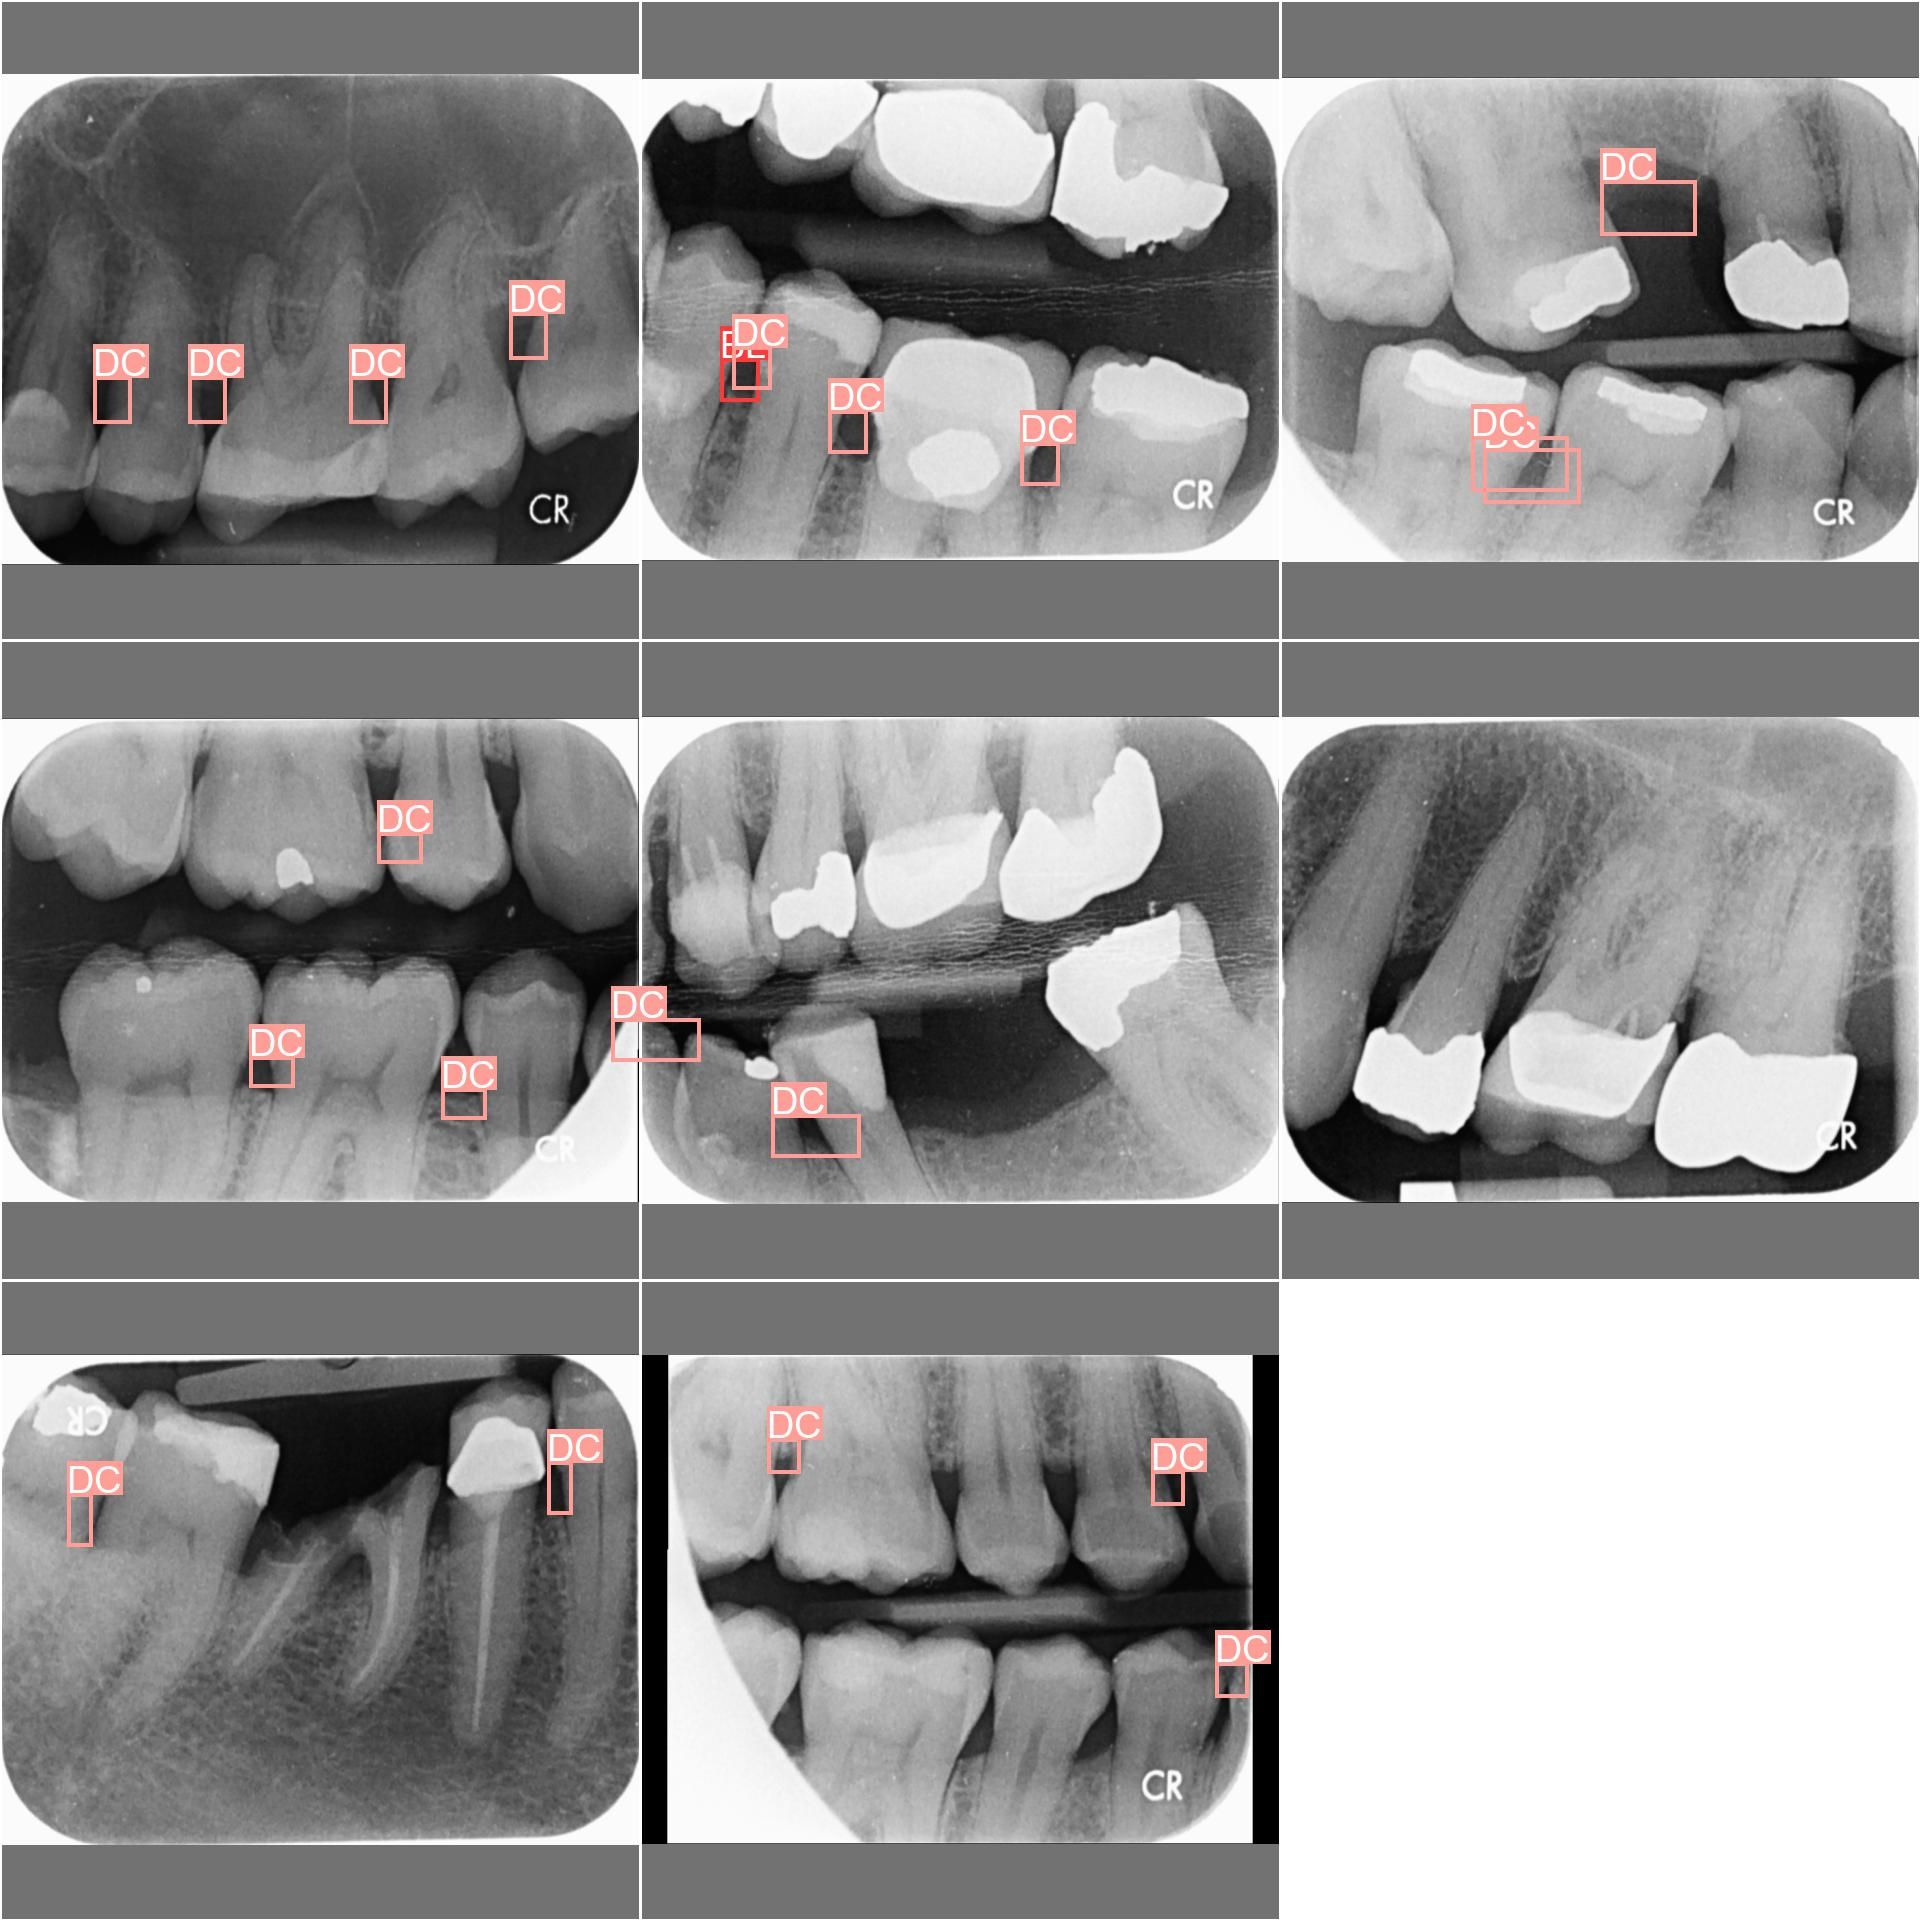

Only YOLO: epoch:4 batch:0


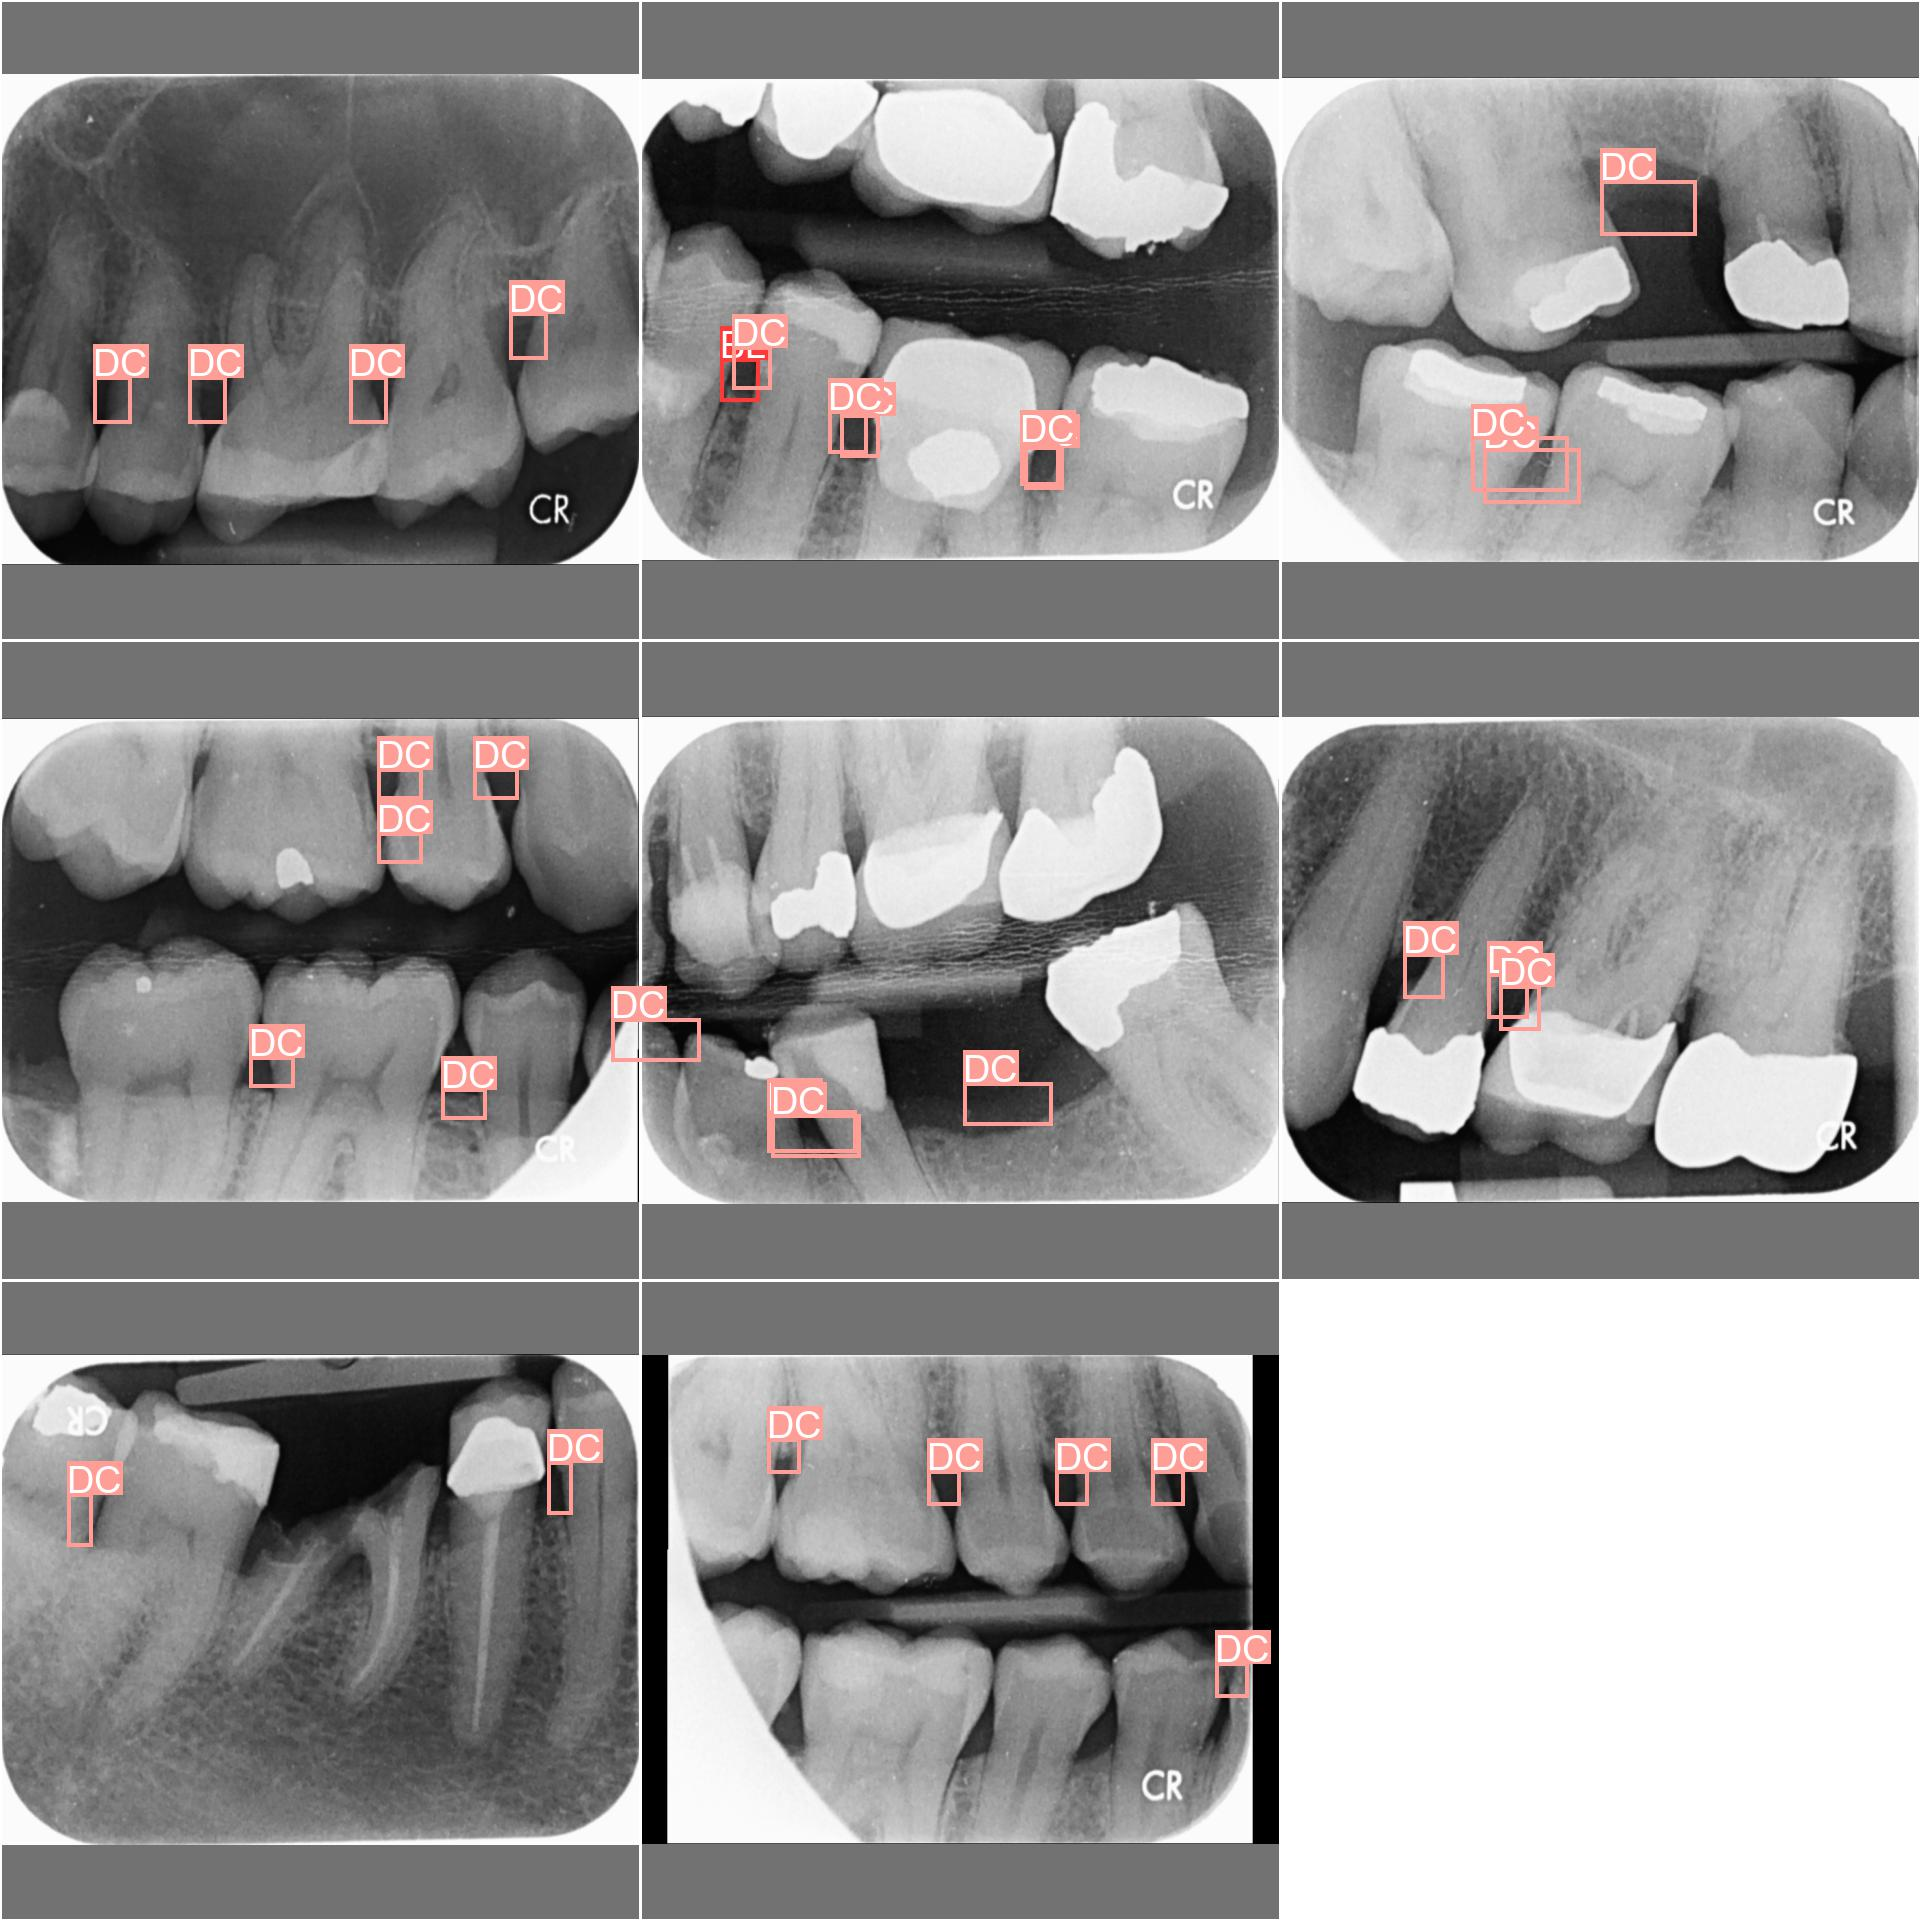

Only YOLO: epoch:5 batch:0


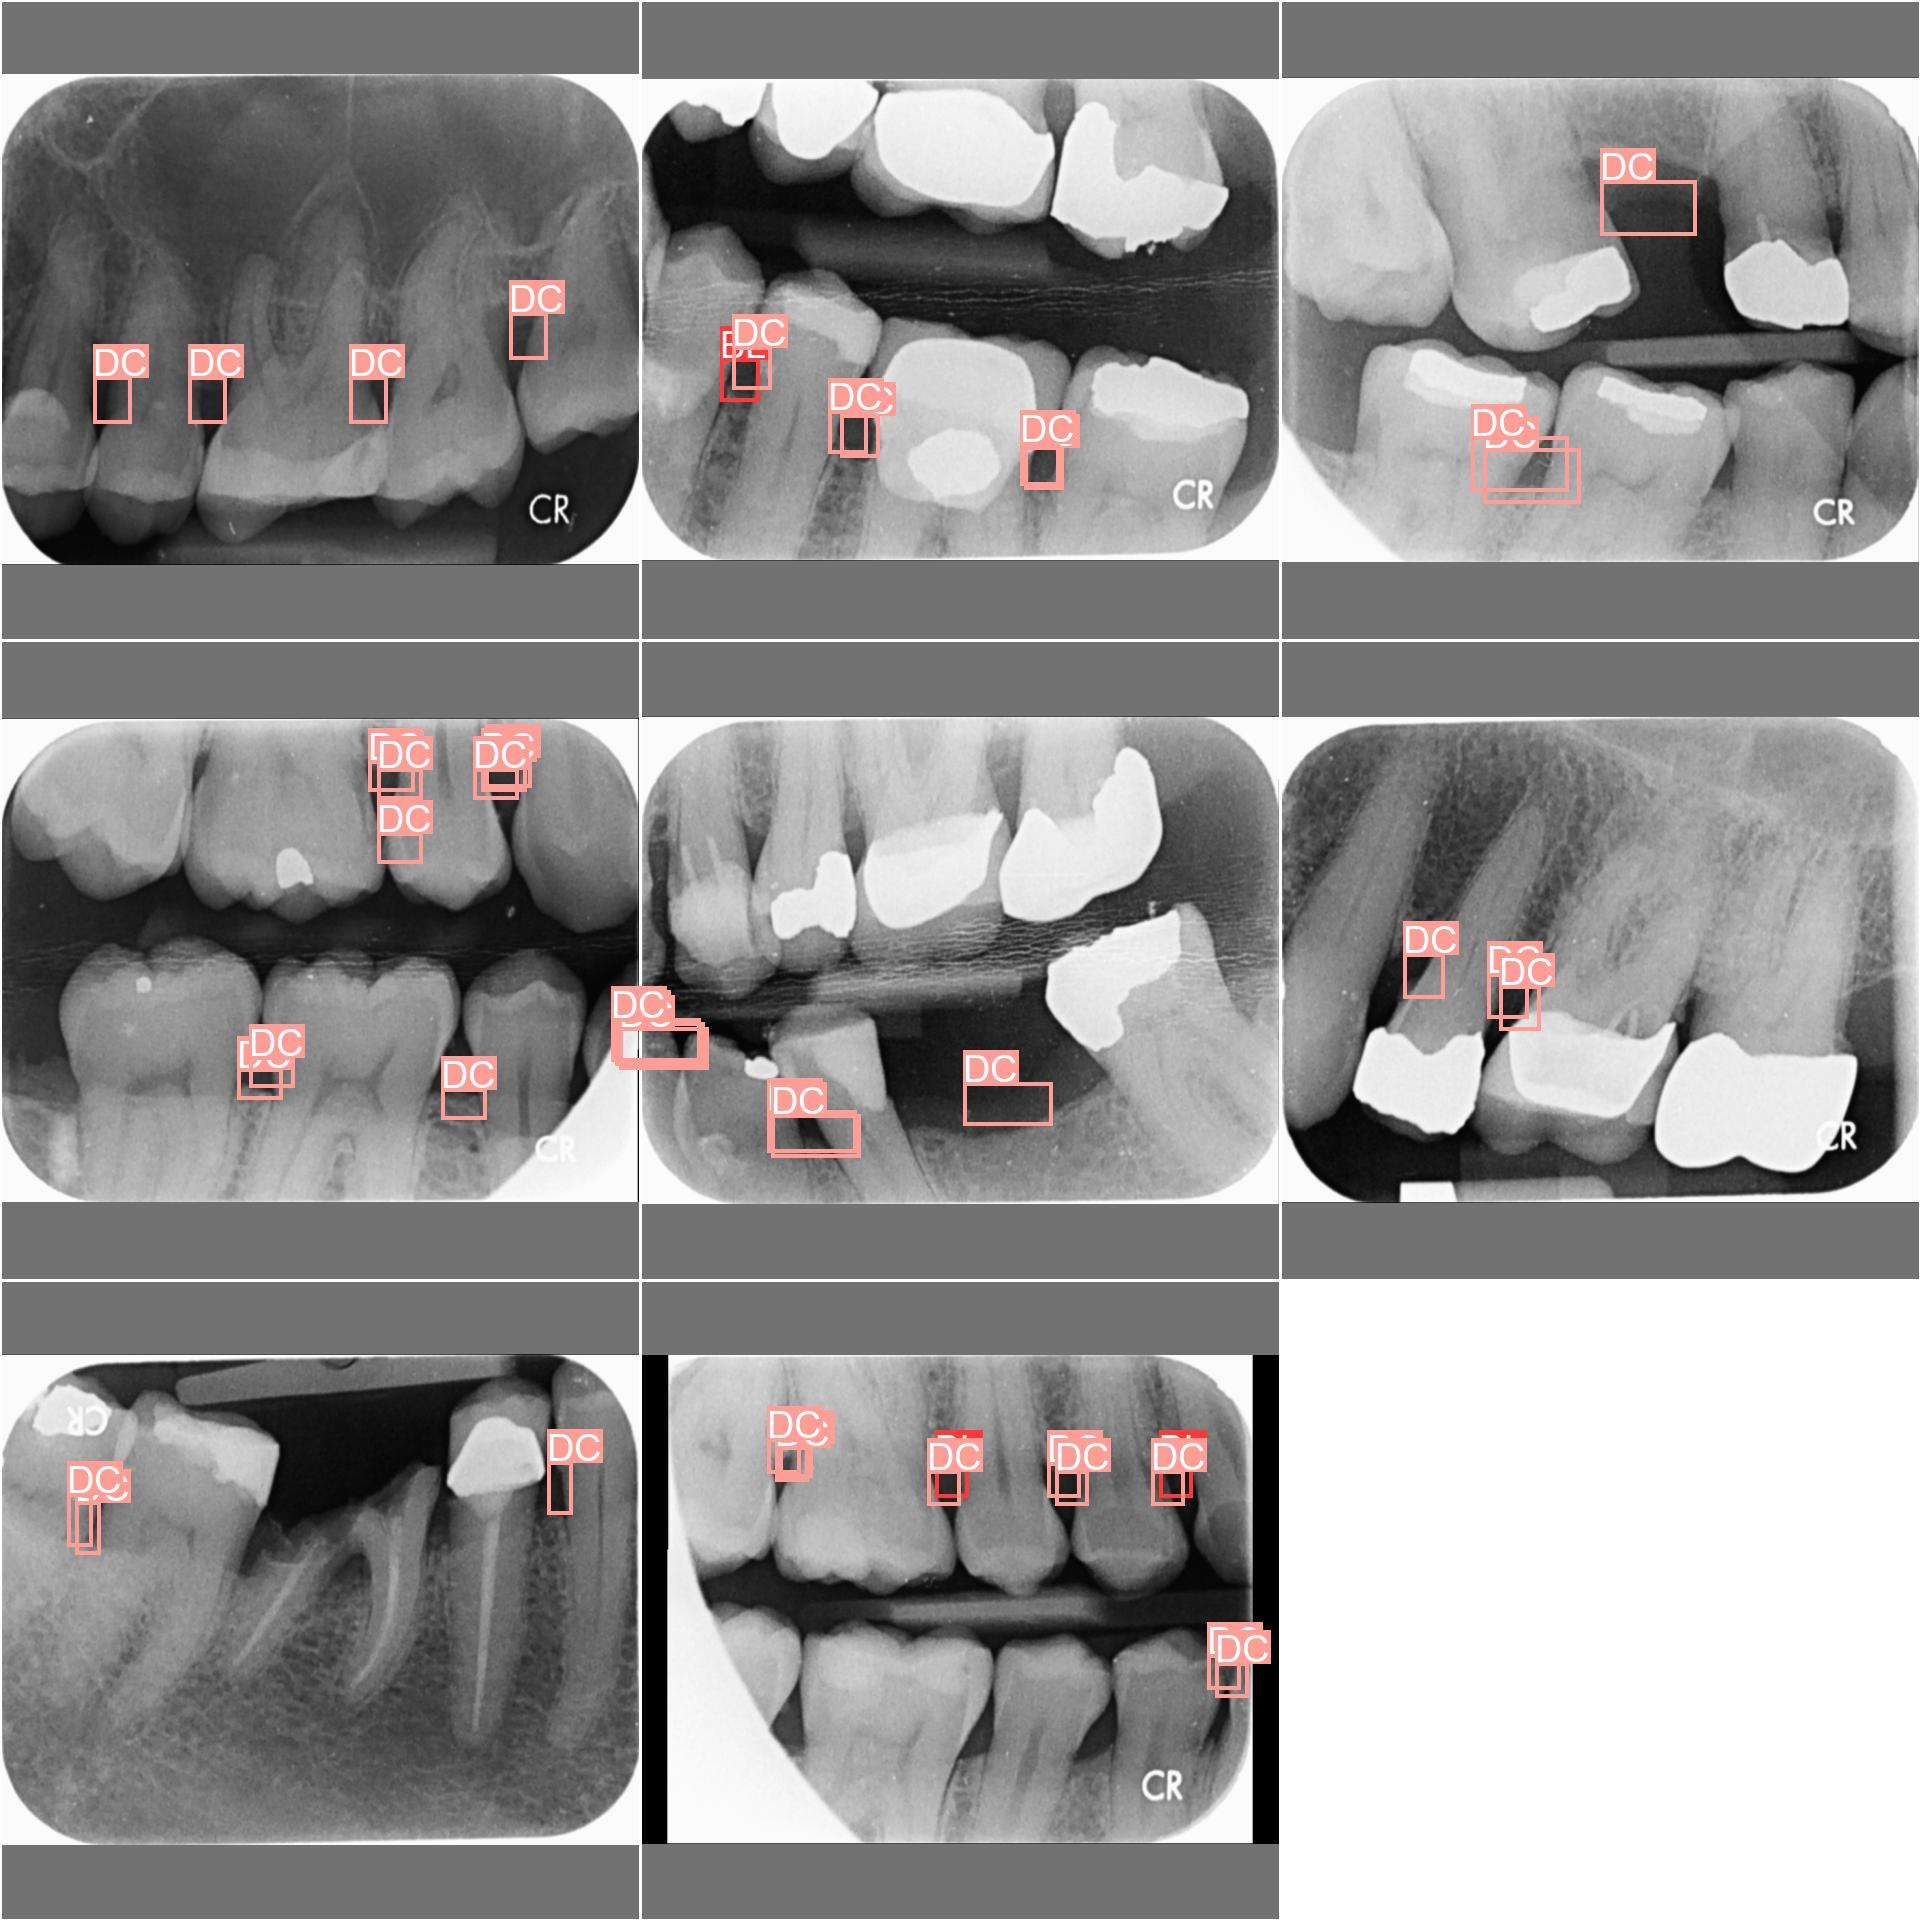

Only YOLO: epoch:6 batch:0


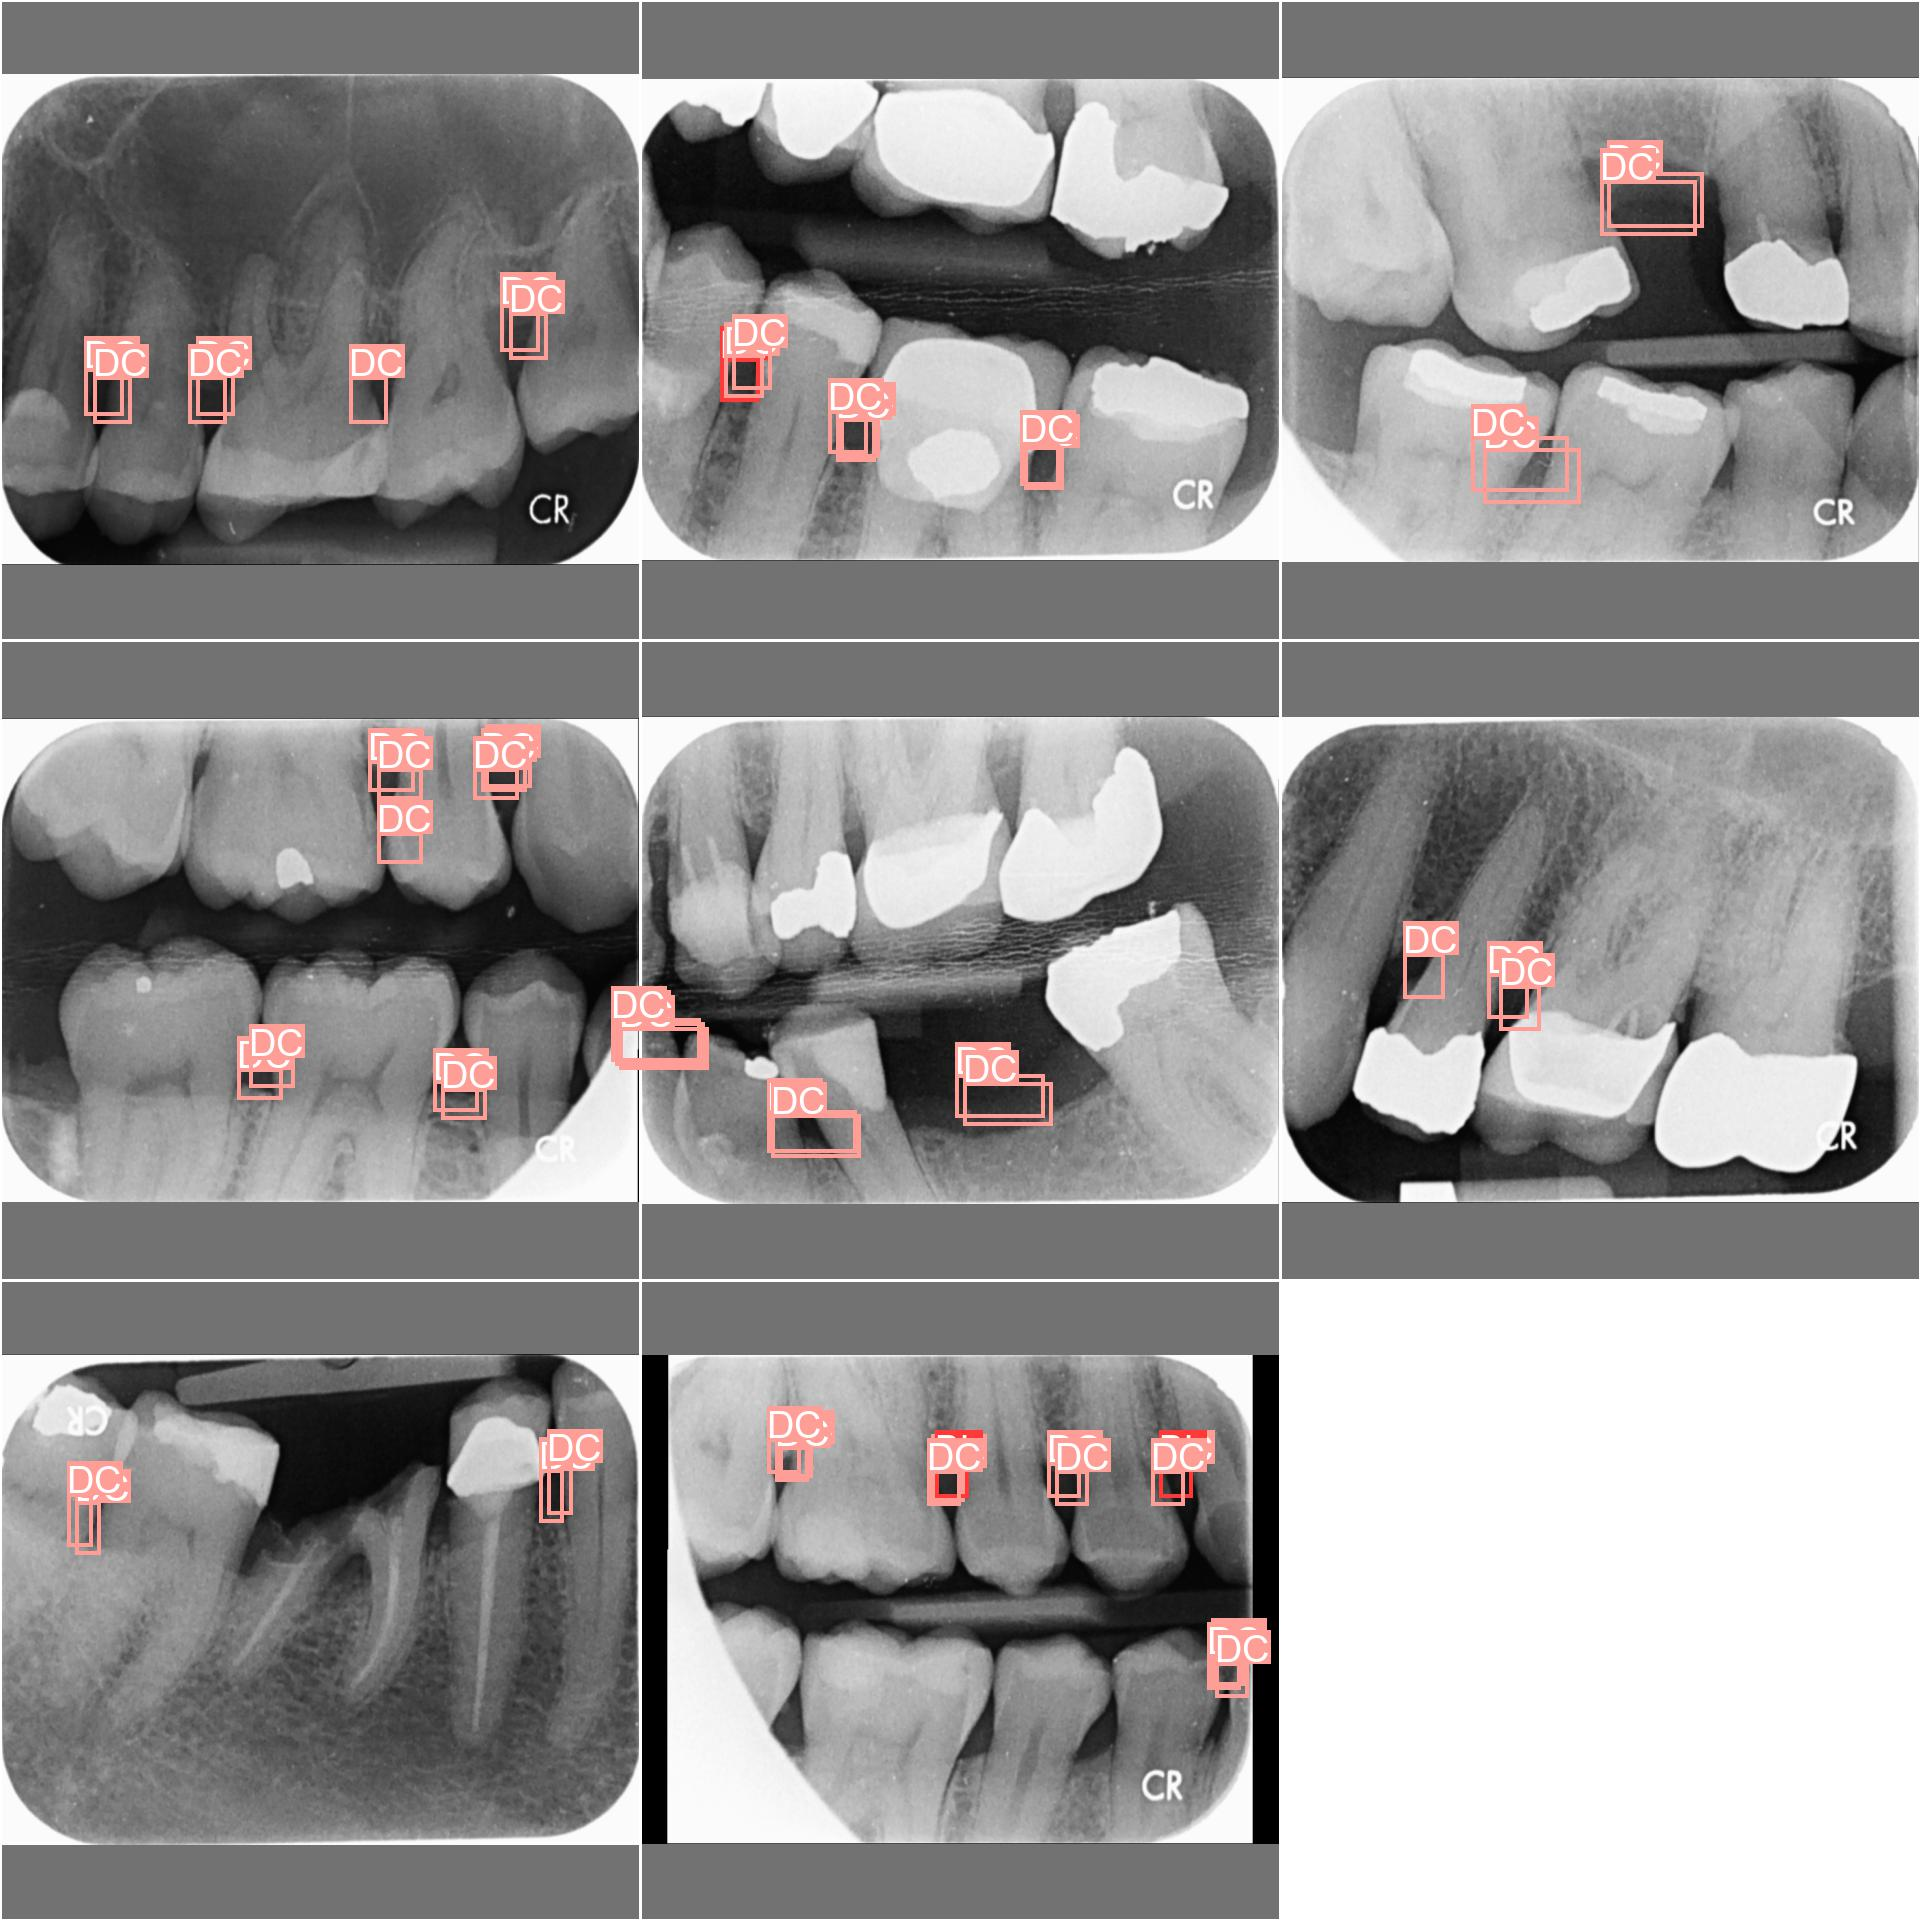

Only YOLO: epoch:7 batch:0


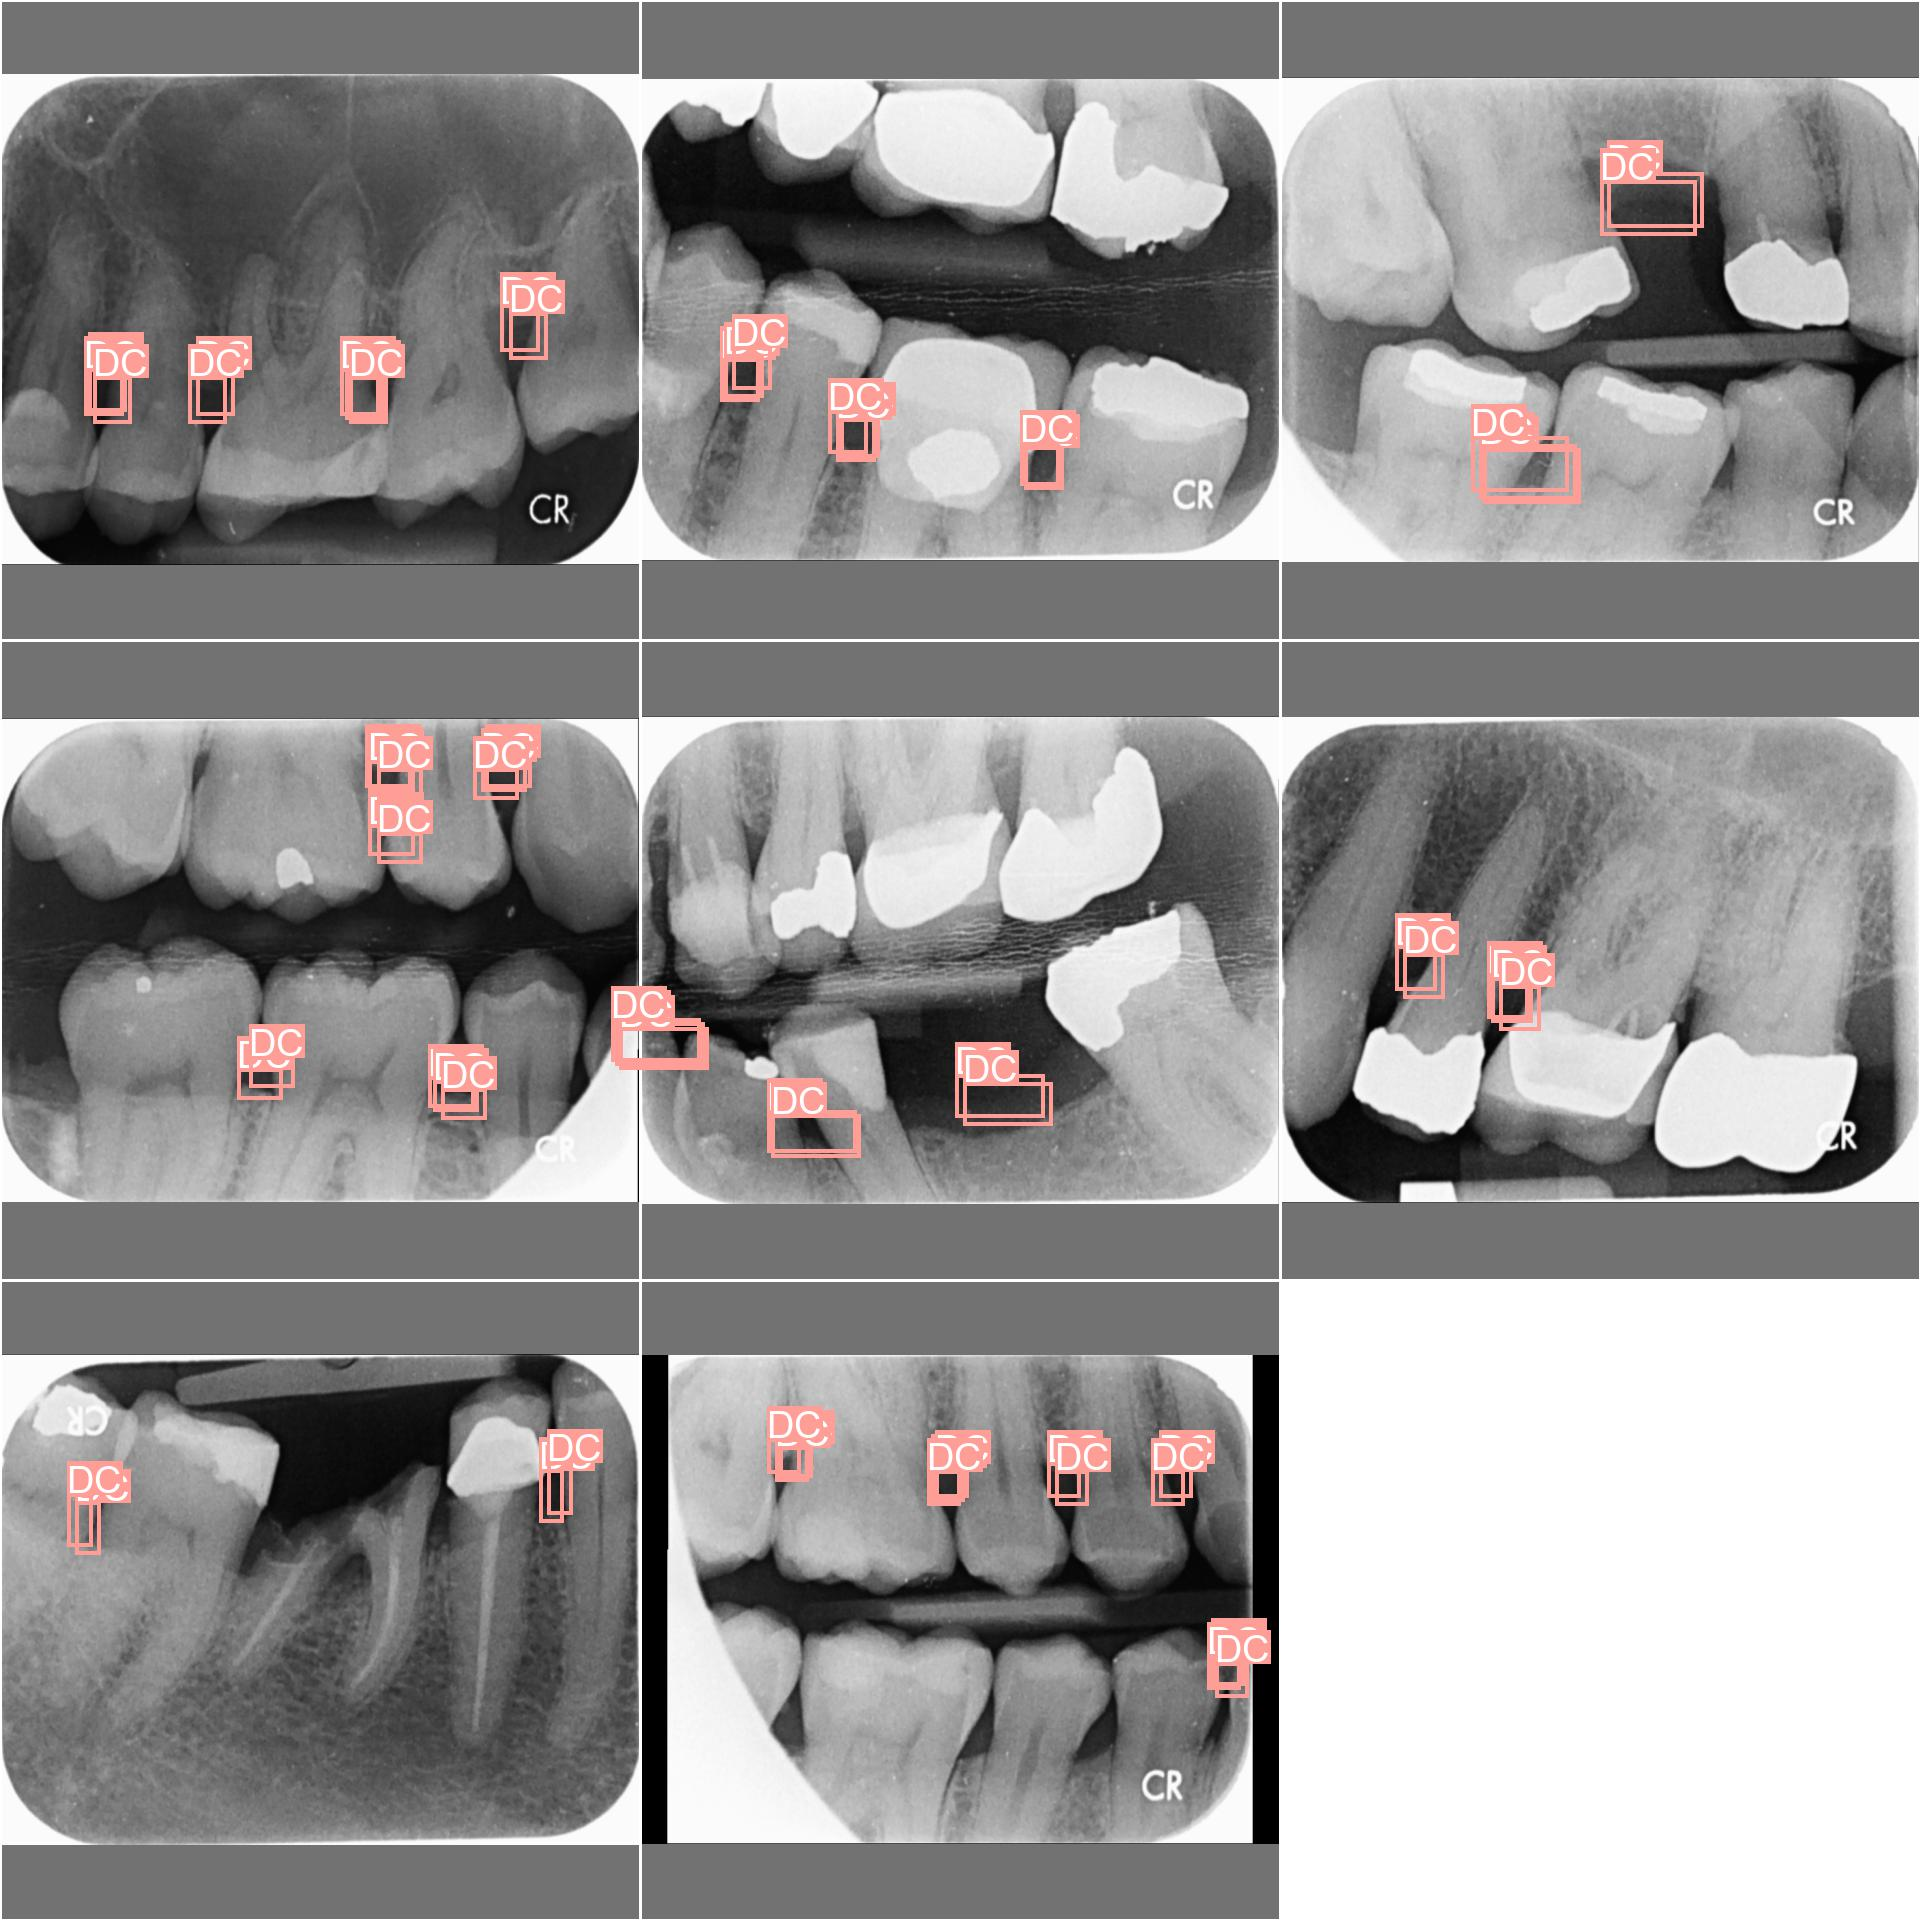

Only YOLO: epoch:8 batch:0


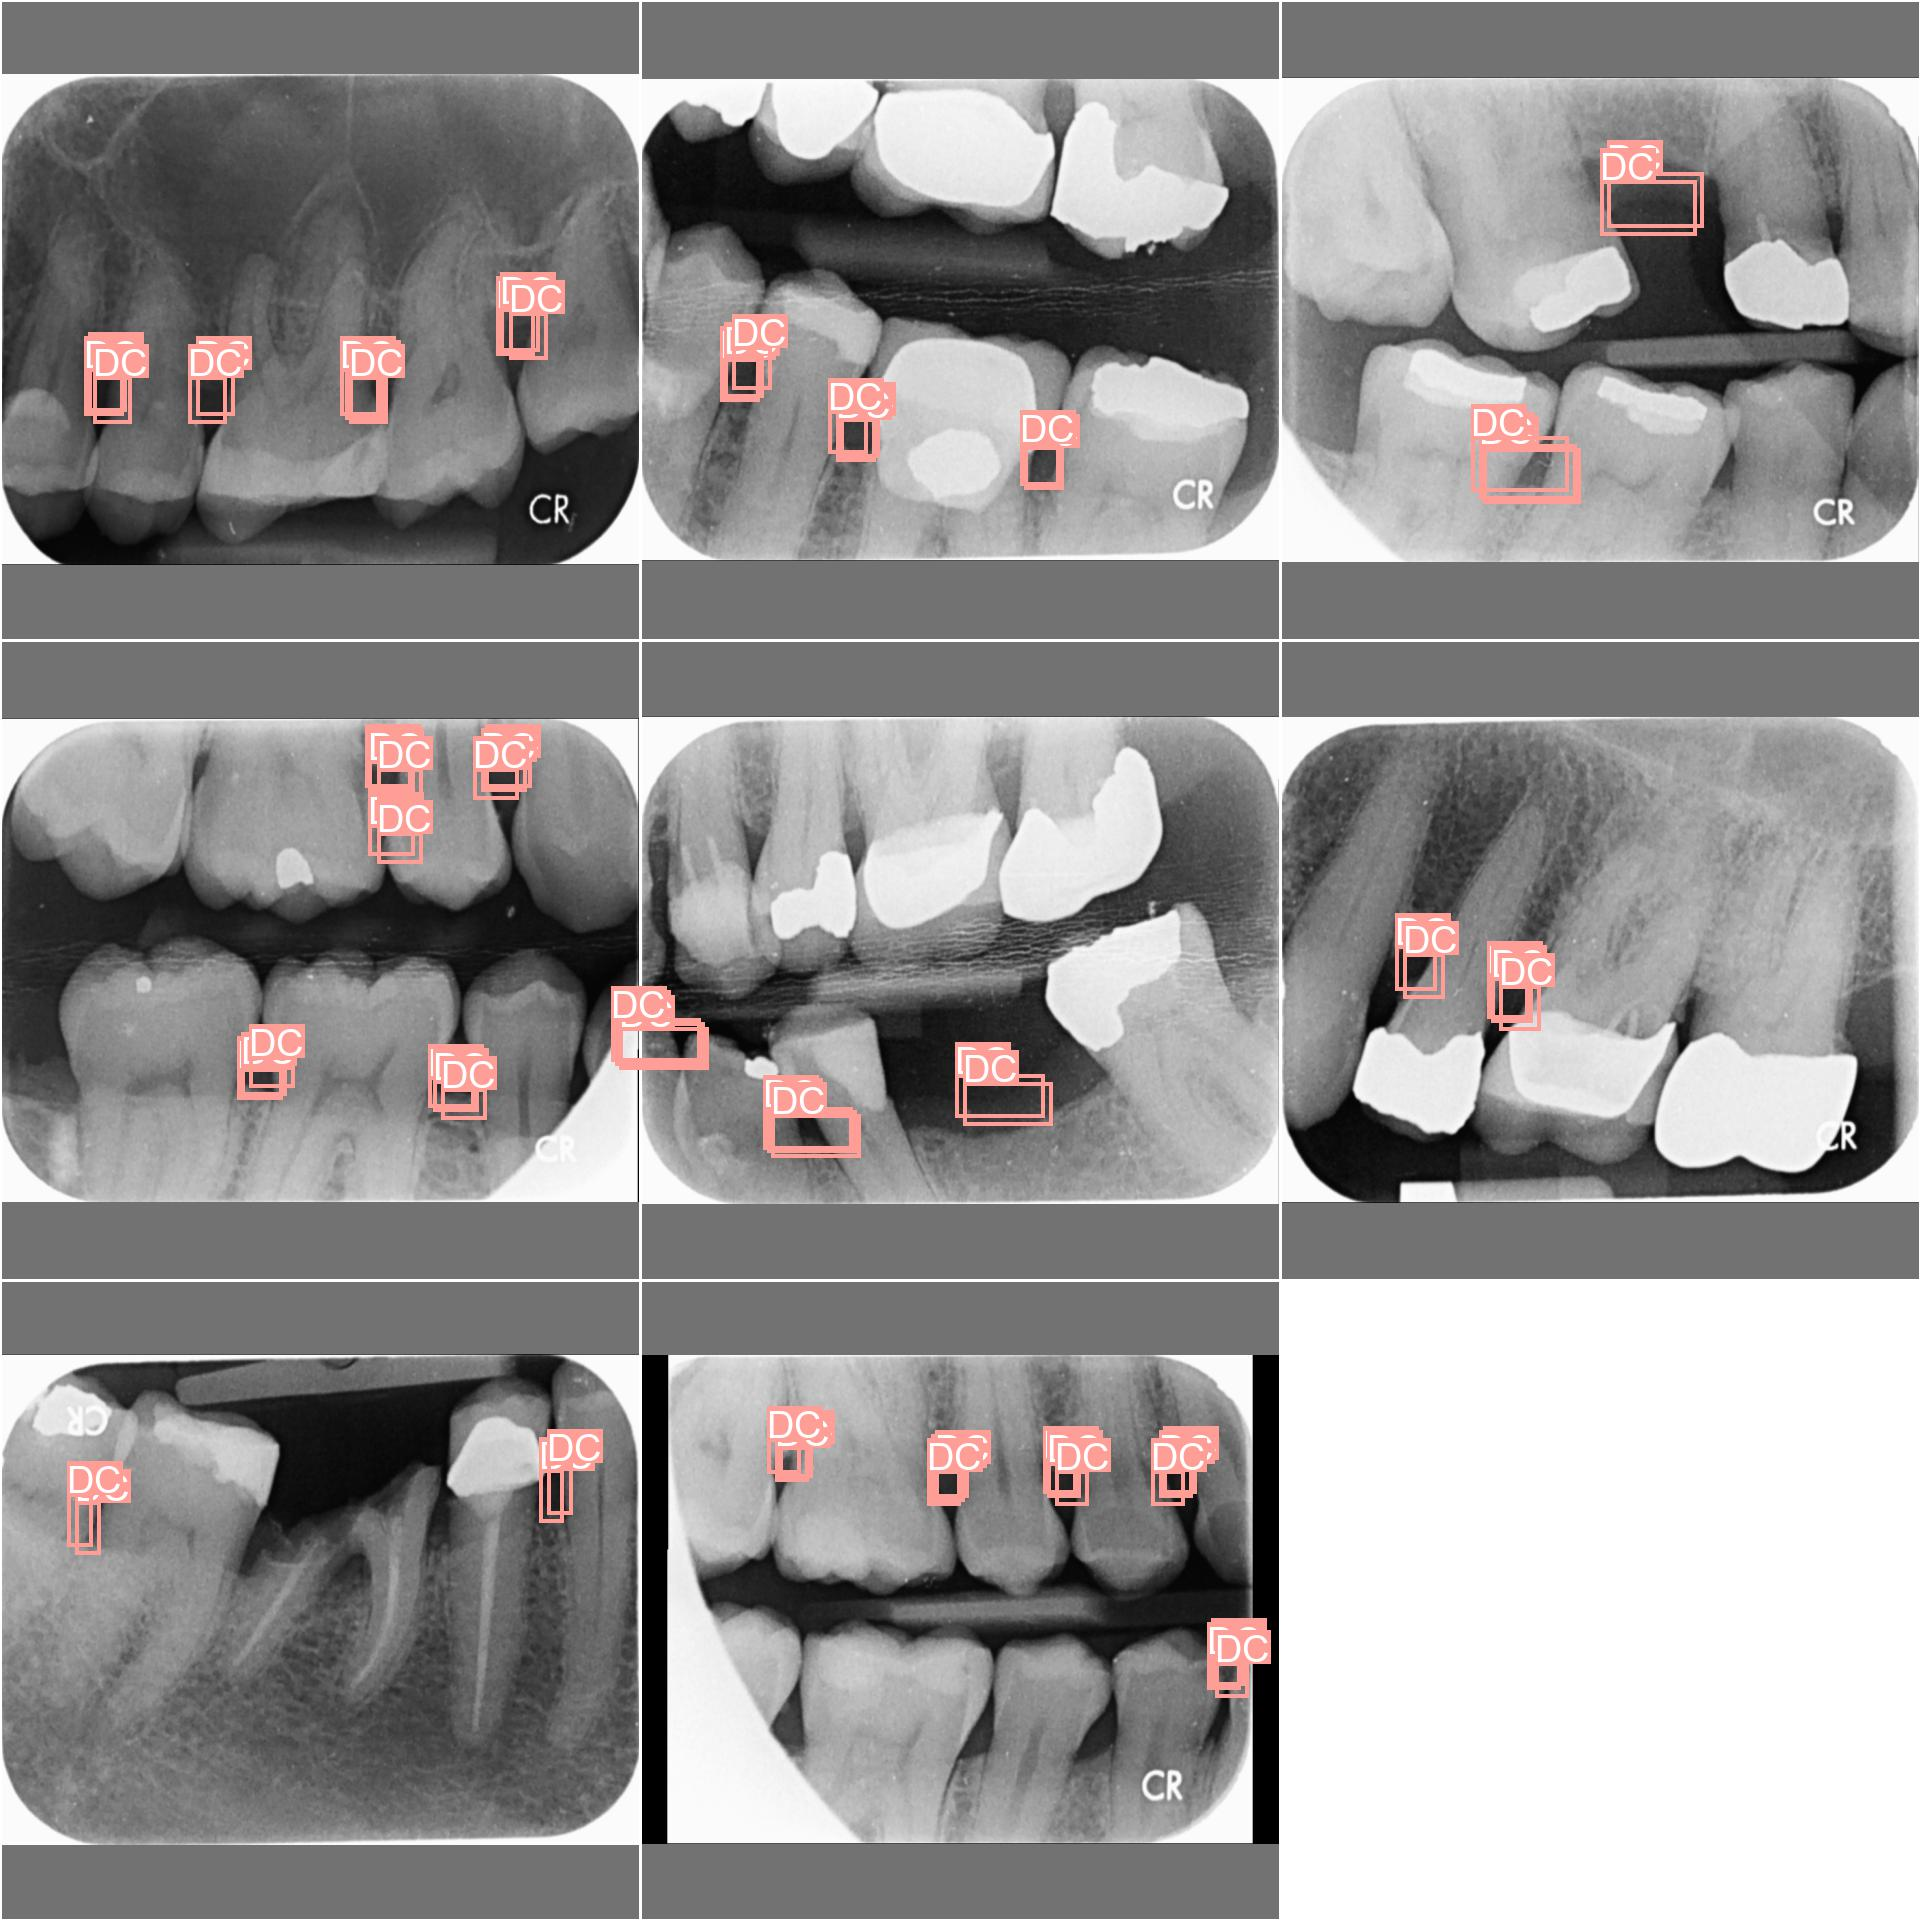

Only YOLO: epoch:9 batch:0


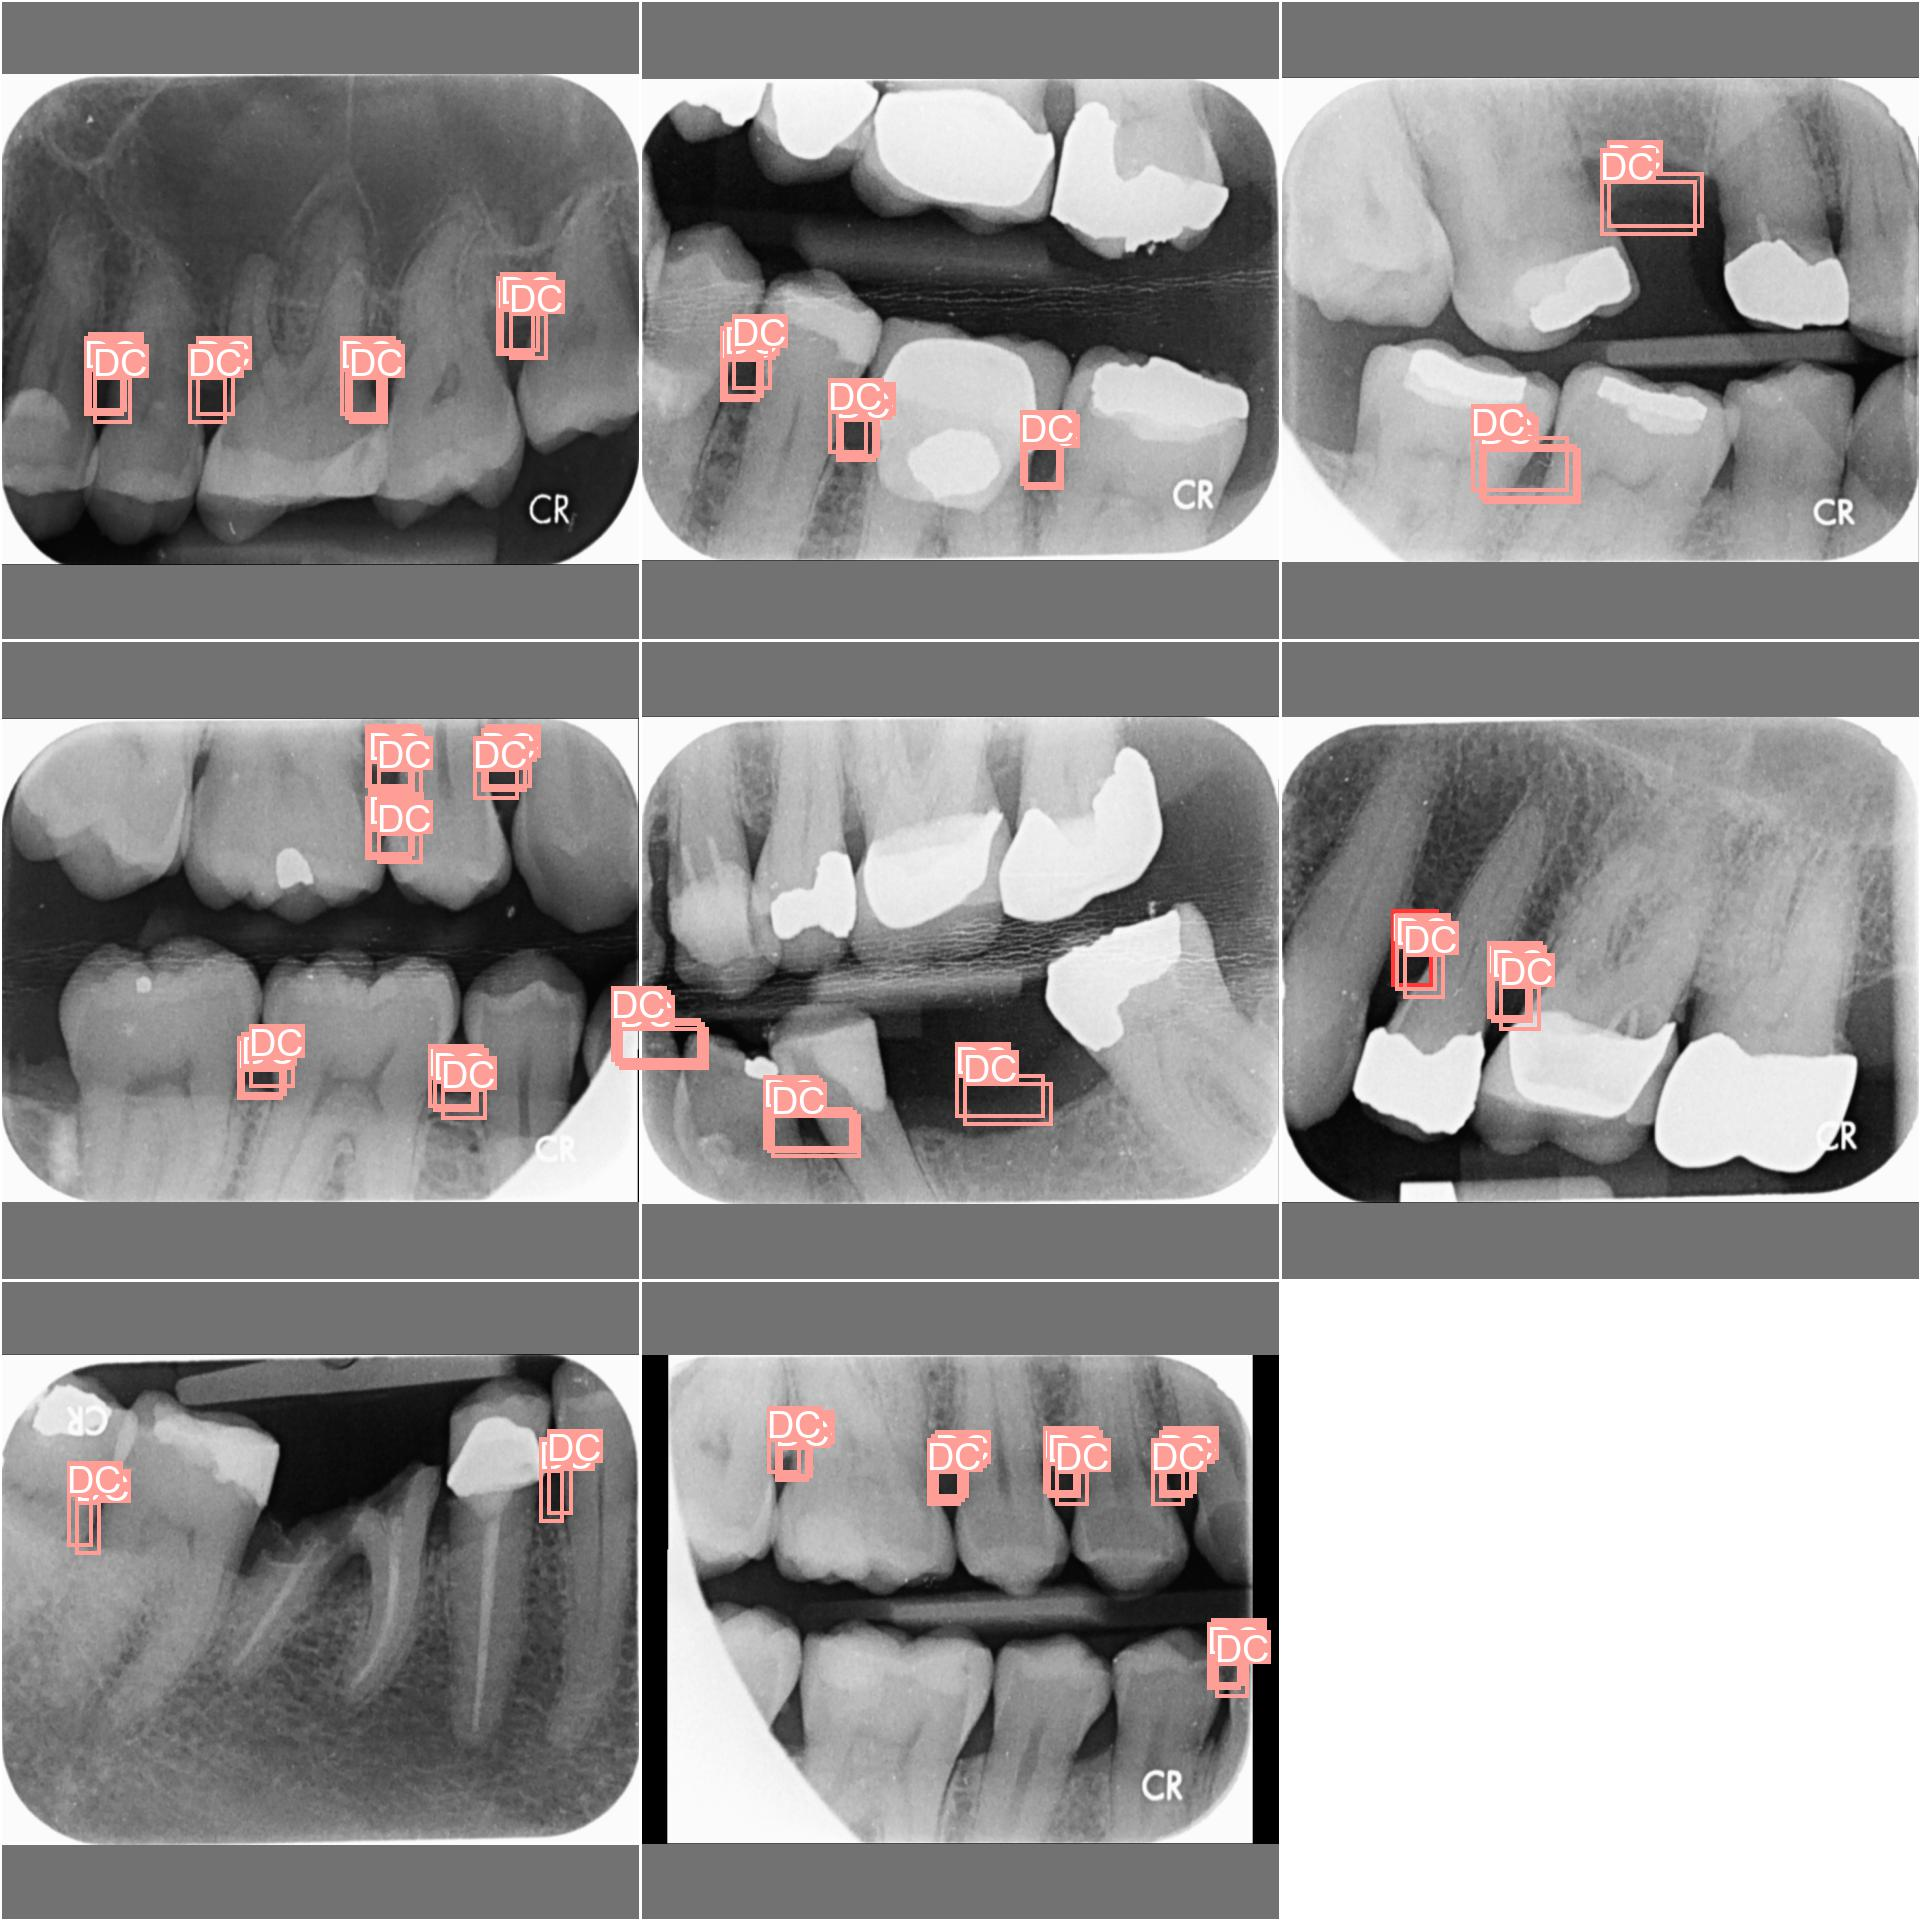

In [25]:
for e in range(3, 10):
    display_img_tgt('yb', e, 0, 'batch_qtargets_yolo')

In [7]:
df1.loc['targets', 'epoch_3']

array([[          0,           0,     0.16258,     0.61119,    0.052239,     0.07874],
       [          0,           0,     0.33209,      0.6213,    0.058635,     0.07342],
       [          0,           1,     0.57143,     0.61705,    0.040512,    0.045755],
       [          0,           0,     0.80117,     0.52075,    0.086354,    0.097894],
       [          1,           0,     0.60224,     0.20803,    0.062833,    0.048928],
       [          1,           0,     0.79073,     0.21069,    0.073482,    0.045737],
       [          1,           0,     0.40575,      0.6888,    0.070288,    0.063818],
       [          1,           0,      0.7098,     0.70316,    0.094782,      0.0351],
       [          1,           1,     0.60011,     0.32237,    0.056443,    0.054246],
       [          2,           0,     0.86301,     0.32951,    0.041578,    0.089505],
       [          2,           0,     0.14925,     0.37853,    0.034115,     0.07885],
       [          3,           0,     0.159

In [8]:
df1.loc['batch_qtargets_yolo', 'epoch_3']

array([[          0,           1,      0.8252,      0.5249,    0.059448,    0.073975],
       [          0,           1,     0.17505,       0.625,    0.059448,    0.073975],
       [          0,           1,     0.32495,       0.625,    0.059448,    0.073975],
       [          0,           1,      0.5752,       0.625,    0.059448,    0.073975],
       [          1,           1,       0.625,     0.32495,    0.071594,    0.049561],
       [          1,           1,     0.42505,      0.6748,    0.071594,    0.049561],
       [          1,           1,      0.7251,      0.7251,    0.071594,    0.049561],
       [          2,           1,       0.875,     0.32495,    0.037842,    0.084167],
       [          2,           1,       0.125,       0.375,    0.037842,    0.084167],
       [          3,           0,     0.15625,     0.59375,    0.060181,    0.067627],
       [          3,           1,     0.32495,      0.6748,    0.060181,    0.067627],
       [          3,           1,     0.175

In [61]:
np.exp(df1.loc['batch_pred_bcc', 'epoch_0'][0, :, :])

array([[  0.0013236,  7.8853e-05,      0.9986],
       [  0.0016704,  0.00011651,     0.99821],
       [  0.0013929,  0.00011948,     0.99849],
       ...,
       [  0.0066459,   0.0094982,     0.98386],
       [  0.0073266,   0.0098113,     0.98286],
       [  0.0081608,     0.01058,     0.98126]], dtype=float32)

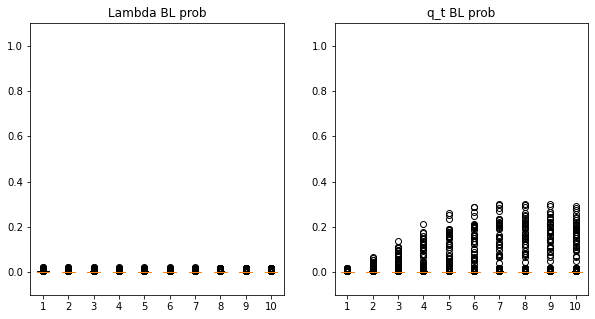

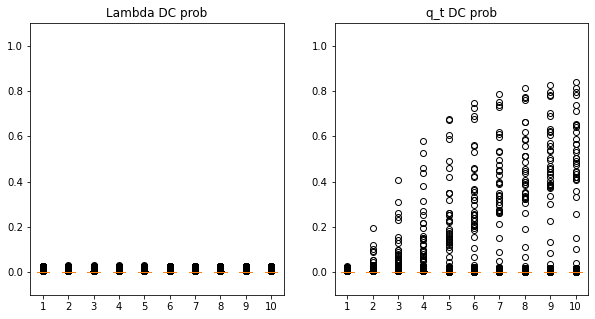

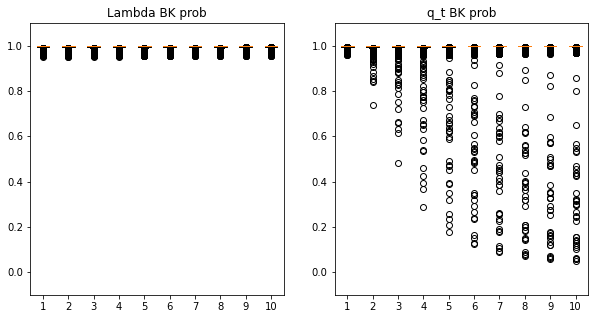

In [74]:
cls = ['BL', 'DC', 'BK']
for j in range(3):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    _ = axs[0].boxplot([np.exp(df1.loc['batch_pred_bcc', f'epoch_{i}'][0, :, j]) for i in range(10)])
    cl = cls[j]
    axs[0].set_title(f'Lambda {cl} prob')
    axs[0].set_ylim(-0.1, 1.1)
    _ = axs[1].boxplot([df1.loc['batch_qtargets', f'epoch_{i}'][0, :, j] for i in range(10)])
    _ = axs[1].set_title(f'q_t {cl} prob')
    _ = axs[1].set_ylim(-0.1, 1.1)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
_ = axs[0].boxplot([np.exp(df1.loc['batch_pred_bcc', f'epoch_{i}'][0, :, 2]) for i in range(10)])
axs[0].set_title('Lambda bkgd prob')
axs[0].set_ylim(-0.1, 1.1)
_ = axs[1].boxplot([df1.loc['batch_qtargets', f'epoch_{i}'][0, :, 2] for i in range(10)])
_ = axs[1].set_title('q_t bkgd prob')
_ = axs[1].set_ylim(-0.1, 1.1)

In [9]:
df1.applymap(find_shape)

,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9
imgs_unn,"(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)"
targets,"(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)"
target_volunteers_bcc,"(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)"
batch_volunteers,"(26,)","(26,)","(26,)","(26,)","(26,)","(26,)","(26,)","(26,)","(26,)","(26,)"
target_volunteers,"(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)"
pred,"[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ..."
batch_pred_yolo,"(8, 25200, 7)","(8, 25200, 7)","(8, 25200, 7)","(8, 25200, 7)","(8, 25200, 7)","(8, 25200, 7)","(8, 25200, 7)","(8, 25200, 7)","(8, 25200, 7)","(8, 25200, 7)"
batch_pred_bcc,"(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)"
batch_qtargets,"(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)","(8, 25200, 3)"
batch_pcm_var,"(3, 3, 1)","(3, 3, 1)","(3, 3, 1)","(3, 3, 1)","(3, 3, 1)","(3, 3, 1)","(3, 3, 1)","(3, 3, 1)","(3, 3, 1)","(3, 3, 1)"


In [22]:
df1.loc['batch_pred_bcc', 'epoch_0'][0, :, :].argmax(axis=-1)

array([2, 2, 2, ..., 2, 2, 2])

In [15]:
from collections import Counter
Counter(df2.loc['targets', 'epoch_0'][:, 1])

Counter({0.0: 21, 1.0: 5})

In [10]:
df2.applymap(find_shape)

,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9
imgs_unn,"(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)"
targets,"(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)"
pred,"[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ..."
loss,"(1,)","(1,)","(1,)","(1,)","(1,)","(1,)","(1,)","(1,)","(1,)","(1,)"
loss_items,"(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)"
mloss,"(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)"
results,7,7,7,7,7,7,7,7,7,7


In [11]:
df3.applymap(find_shape)

,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9
imgs_unn,"(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)","(8, 3, 640, 640)"
targets,"(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)","(26, 6)"
target_volunteers_bcc,"(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)","(8, 25200, 1)"
batch_volunteers,"(26,)","(26,)","(26,)","(26,)","(26,)","(26,)","(26,)","(26,)","(26,)","(26,)"
target_volunteers,"(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)","(26, 7)"
pred,"[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ...","[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, ..."
loss,"(1,)","(1,)","(1,)","(1,)","(1,)","(1,)","(1,)","(1,)","(1,)","(1,)"
loss_items,"(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)"
mloss,"(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)","(3,)"
results,7,7,7,7,7,7,7,7,7,7


In [58]:
# df1.loc['batch_pred_yolo', 'epoch_0'].shape, 
[x.shape for x in df1.loc['pred', 'epoch_0']]

[(8, 3, 80, 80, 7), (8, 3, 40, 40, 7), (8, 3, 20, 20, 7)]

In [51]:
for k in ['batch_qtargets', 'batch_qtargets_yolo']:
    for e in range(5):
        print(e, k, df1.loc[k, f'epoch_{e}'].shape, df2.loc['targets', f'epoch_{e}'].shape)

0 batch_qtargets (8, 25200, 3) (26, 6)
1 batch_qtargets (8, 25200, 3) (26, 6)
2 batch_qtargets (8, 25200, 3) (26, 6)
3 batch_qtargets (8, 25200, 3) (26, 6)
4 batch_qtargets (8, 25200, 3) (26, 6)
0 batch_qtargets_yolo (0, 6) (26, 6)
1 batch_qtargets_yolo (0, 6) (26, 6)
2 batch_qtargets_yolo (6, 6) (26, 6)
3 batch_qtargets_yolo (29, 6) (26, 6)
4 batch_qtargets_yolo (63, 6) (26, 6)


In [39]:
df1.loc['loss', 'epoch_0'], df2.loc['loss', 'epoch_0']

(array([    0.18975], dtype=float32), array([     2.9903], dtype=float32))

In [20]:
def is_entry_eq(df1, df2, row1, col1, row2=None, col2=None, verbosity=1):
    if row2 is None:
        row2 = row1
    if col2 is None:
        col2 = col1
    flag = equals(df1.loc[row1, col1], df2.loc[row2, col2])
    if verbosity == 1:
        print(flag)
    rc1 = (row1, col1)
    rc2 = (row2, col2) if (row1 != row2 and col1 != col2) else (col1 if col1 != col2 else (row1 if row1 != row2 else ''))
    if verbosity == 2:
        print((row1, col1), (row2, col2), flag)

In [21]:
# Direct equality
rows = ['imgs_unn', 'targets', 'pred', 'loss', 'loss_items', 'mloss']
cols = [f'epoch_{i}' for i in range(5)]
for row in rows:
#     print('***', row, '***')
    for col in cols:
        is_entry_eq(df1, df2, row, col, verbosity=2)

('imgs_unn', 'epoch_0') ('imgs_unn', 'epoch_0') True
('imgs_unn', 'epoch_1') ('imgs_unn', 'epoch_1') True
('imgs_unn', 'epoch_2') ('imgs_unn', 'epoch_2') True
('imgs_unn', 'epoch_3') ('imgs_unn', 'epoch_3') True
('imgs_unn', 'epoch_4') ('imgs_unn', 'epoch_4') True
('targets', 'epoch_0') ('targets', 'epoch_0') True
('targets', 'epoch_1') ('targets', 'epoch_1') True
('targets', 'epoch_2') ('targets', 'epoch_2') True
('targets', 'epoch_3') ('targets', 'epoch_3') True
('targets', 'epoch_4') ('targets', 'epoch_4') True
('pred', 'epoch_0') ('pred', 'epoch_0') True
('pred', 'epoch_1') ('pred', 'epoch_1') False
('pred', 'epoch_2') ('pred', 'epoch_2') False
('pred', 'epoch_3') ('pred', 'epoch_3') False
('pred', 'epoch_4') ('pred', 'epoch_4') False
('loss', 'epoch_0') ('loss', 'epoch_0') False
('loss', 'epoch_1') ('loss', 'epoch_1') False
('loss', 'epoch_2') ('loss', 'epoch_2') False
('loss', 'epoch_3') ('loss', 'epoch_3') False
('loss', 'epoch_4') ('loss', 'epoch_4') False
('loss_items', 'epoch

In [22]:
# Equality-pairs
row_pairs = [('targets', 'batch_cstargets_union')]
for row1, row2 in row_pairs:
    for col in cols:
        is_entry_eq(df1, df2, row1, col, row2, col, verbosity=2)

KeyError: 'batch_cstargets_union'

In [ ]:
df1.loc['targets', 'epoch_0'], df2.loc['batch_cstargets_union', 'epoch_0']